# **CONTEXT**

**Company Name:** Insurance All

**Product/Service:** Offer Health Insurance

**Business Model:** An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

**Current Situation:** Now they want to offer a car insurance. Last year they did a research with their 380 thousand customers about their interest in getting a car insurance, and the results has been storage in a database together with others customers attributes.
The product team selected 127 thousand new customers to participate in a marketing campaing that will be offering the new car insurance to them. The campaing will be made through phone calls by the sales team.

**Problem:** The problem is that the sales team has capacity of making only 20 thousand calls on the period the campaing will be running.

**Proposed Solution:** Predict the likelihood of the customer of getting the car insurance so that the sales team can prioritize which customer to call to have a better conversion rate.

**Deliverables:** A report answering the following questions:

   **1.** Main insights of the most relevant attributes of the customers interested in getting the car insurance;
    
   **2.** Percentage of interested customers the sales team will be able to call with 20.000 calls;
    
   **3.** Percentage of interested customers the sales team will be able to call with 40.000 calls;
    
   **4.** How many calls the sales team have to make to reach 80% of the interested customers.

# SPRINTS

**SPRINT 1 (05/01 - 12/01)**
- <s>Solution Planning (Done)</s>;
- <s>Data Collection (Done)</s>;
    
**SPRINT 2 (12/01 - 19/01)**
- <s>Descriptive Analysis</s>;
- <s>Business Research (What is a cross-sell)</s>;

**SPRINT 3 (19/01 - 26/01)**
- EDA;
- Insight Report;

**SPRINT 4 (26/01 - 02/02)**
- Data Preparation;

**SPRINT 5 (02/02 - 09/02)**
- Implementation of Machine Learning Models;

**SPRINT 6 (09/02 - 16/02)**
- Business Metrics (KPI);
- Translate to business metrics;

**SPRINT 7 (16/02 - 23/02)**
- Deploy of the Model in Production;

**SPRINT 8 (23/02 - 02/03)**
- Access of the data in the Model in Production;

**SPRINT 9 (02/03 - 09/03)**
- Presentation to Business Team;

**SPRINT 10 (09/03 - 16/03)**
- Write an article;
- What I Learned;

# IMPORTS

In [152]:
# Data Manipulation
import pandas as pd
import numpy as np
import statistics as st

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

# General Utilities
import pickle
import warnings
warnings.filterwarnings('ignore')

# Database Library
import psycopg2

# General Utilities
from IPython.display import Image

# BUSINESS RESEARCH

https://www.relakhs.com/insurance-companies-business-model/

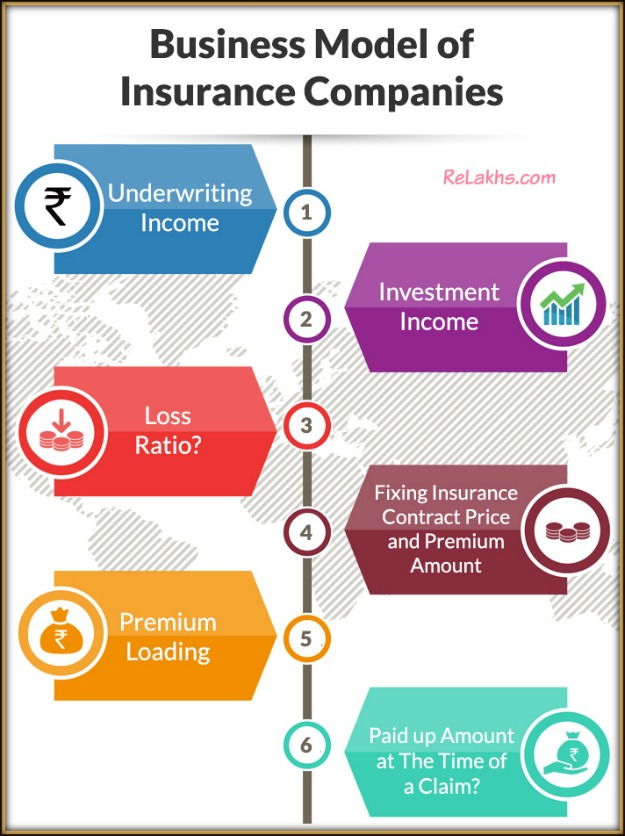

In [2]:
Image('images/business-model-of-insurance-companies-pic.jpeg')

# HELPER FUNCTIONS

# 1.0. SOLUTION PLANNING

- Build a Machine Learning model to calculate the likelihood of customers getting the car insurance. For that we will do the following steps:
    - Data Collecting: from the Database;
    - Descriptive analysis:  see how the data is. (To see how much work needs to be done to processing data.)
    - Exploratory Data Analisys:  see the behavior of the data (features).
    - Data Preparation: Preparating data to fit into machine learning model;
    - Implementation of machine learning models;
    - Interpretating the metrics of the model;
    - Translating the model metrics to business metrics;
    - Deploy of the model in production;
 

## 1.1. Main insights of the most relevant attributes of the customers interested in getting the car insurance;

- Compare the data between those that are interested and those that are not interested through EDA;
- See if there are any insight. (different behavior in datas)

## 1.2. Percentage of interested customers the sales team will be able to call with 20.000 calls;

- Use Machine Learning to predict the total number of customers that are interested in getting a car insurence from those 127 thousand customers that will be participating in the marketing campaing;
- From that, we can calculate the percentage of customers the sales team will be able to reach with 20.000 calls.

## 1.3. Percentage of interested custumers the sales team will be able to call with 40.000 calls;

- Same as 1.2.

## 1.4. How many calls the sales team have to make to reach 80% of the interested custumers.

- After calculating the total number of customers interested in getting car insurance, we can calculate how many calls would be necessary to reach 80% of those customers.

# 2.0. GETTING THE DATA FROM DATABASE

In [3]:
# Credentials of the Database
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
password = 'cdspa'

# Connecting to Database
conn = psycopg2.connect(host=host, port=port, database=database, user=username, password=password)

# Cursor
cursor = conn.cursor()

In [4]:
# Listing Schemas
cursor.execute("SELECT nspname FROM pg_catalog.pg_namespace;")
print (cursor.fetchall())

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',)]


In [5]:
# Showing tables from Database
cursor.execute("SELECT tablename FROM pg_tables WHERE schemaname='pa004';")
print (cursor.fetchall())

[('users',), ('vehicle',), ('insurance',)]


In [6]:
# query all data from tables (users, vehicle, insurance)
query_tables = """SELECT * FROM pa004.users u LEFT JOIN pa004.vehicle v ON (u.id = v.id)
                                              LEFT JOIN pa004.insurance i ON (u.id = i.id)"""

df_raw_tables = pd.read_sql(query_tables, conn)

# closing cursor and connection
cursor.close()
conn.close()

In [7]:
# Checking the dataframe
df_raw_tables.head()

,id,gender,age,region_code,policy_sales_channel,id,driving_license,vehicle_age,vehicle_damage,id,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,7,1,< 1 Year,Yes,7,0,23367.0,249,0
1,13,Female,41,15.0,14.0,13,1,1-2 Year,No,13,1,31409.0,221,0
2,18,Female,25,35.0,152.0,18,1,< 1 Year,No,18,1,46622.0,299,0
3,31,Female,26,8.0,160.0,31,1,< 1 Year,No,31,0,2630.0,136,0
4,39,Male,45,8.0,124.0,39,1,1-2 Year,Yes,39,0,42297.0,264,0


In [8]:
# Removing duplicated id columns
df_raw_tables = df_raw_tables.loc[:,~df_raw_tables.columns.duplicated()]
df_raw_tables.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


# 3.0. DESCRIPTIVE ANALYSIS

In [133]:
df3 = df_raw_tables.copy()

In [10]:
print(f'There are {df3.shape[0]} rows')
print(f'There are {df3.shape[1]} columns')

There are 381109 rows
There are 12 columns


In [11]:
# Description of variables
variables = {'id': 'Unique ID for the customer',
             'gender': '(Male or Female)',
             'age': 'Age of the customer',
             'region_code': 'Unique code for the region of the customer',
             'policy_sales_channel': 'Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.', 
             'driving_license': '0 : Customer does not have DL, 1 : Customer already has DL',
             'vehicle_age': '< 1 Year, 1-2 Year, > 2 Years',
             'vehicle_damage': "Yes or No",
             'previously_insured': "1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance",
             'annual_premium': 'The amount customer needs to pay as premium in the year',
             'vintage': 'Number of Days, Customer has been associated with the company',
             'response': '1 : Customer is interested, 0 : Customer is not interested'}


pd.set_option('display.max_colwidth', -1);
pd.DataFrame.from_dict(variables, orient='index', columns=['description'])

,description
id,Unique ID for the customer
gender,(Male or Female)
age,Age of the customer
region_code,Unique code for the region of the customer
policy_sales_channel,"Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc."
driving_license,"0 : Customer does not have DL, 1 : Customer already has DL"
vehicle_age,"< 1 Year, 1-2 Year, > 2 Years"
vehicle_damage,Yes or No
previously_insured,"1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance"
annual_premium,The amount customer needs to pay as premium in the year


## 3.1. Checking NA

In [12]:
df3.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

No missing values in the data set

## 3.2. Checking Data Types

In [134]:
df3.dtypes

id                      int64  
gender                  object 
age                     int64  
region_code             float64
policy_sales_channel    float64
driving_license         int64  
vehicle_age             object 
vehicle_damage          object 
previously_insured      int64  
annual_premium          float64
vintage                 int64  
response                int64  
dtype: object

No need to change data types

## 3.3. Descriptive Statistics

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   region_code           381109 non-null  float64
 4   policy_sales_channel  381109 non-null  float64
 5   driving_license       381109 non-null  int64  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   previously_insured    381109 non-null  int64  
 9   annual_premium        381109 non-null  float64
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### 3.3.1. Target Attribute

In [15]:
df3['response'].value_counts()

0    334399
1    46710 
Name: response, dtype: int64

In [16]:
df3['response'].value_counts(normalize=True)

0    0.877437
1    0.122563
Name: response, dtype: float64

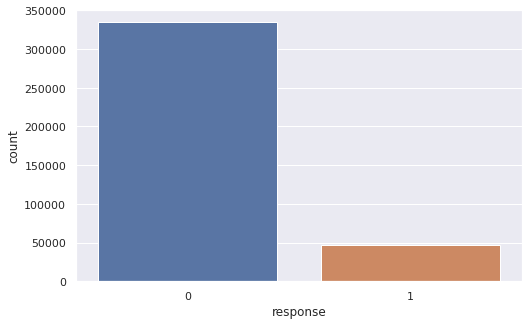

In [153]:
plt.figure(figsize=[8, 5])
sns.countplot(data=df3, x='response');

So there are only 12.25% of the target attribute that has interest in getting a car insurance.

This shows us that the data is unbalanced.

### 3.3.2 Numerical Attributes

In [154]:
# Calculating statistics
descrip_stats_num = df3.describe()

# mode
descrip_stats_num.loc['mode'] = df3.apply(lambda x: st.mode(x))

# range
descrip_stats_num.loc['range'] = descrip_stats_num.loc['max'] - descrip_stats_num.loc['min']

# skew
descrip_stats_num.loc['skew'] = df3.skew()

# kurtosis
descrip_stats_num.loc['kurtosis'] = df3.kurtosis()


descrip_stats_num.reindex(['count',
                           'min',
                           '25%',
                           '50%',
                           '75%',
                           'max',
                           'range',
                           'std',
                           'mean',
                           'mode',
                           'skew',
                           'kurtosis']).T

,count,min,25%,50%,75%,max,range,std,mean,mode,skew,kurtosis
id,381109.0,1.0,95278.0,190555.0,285832.0,381109.0,381108.0,110016.836208,190555.000000,7.0,-8.071174e-18,-1.200000
age,381109.0,20.0,25.0,36.0,49.0,85.0,65.0,15.511611,38.822584,24.0,6.725390e-01,-0.565655
region_code,381109.0,0.0,15.0,28.0,35.0,52.0,52.0,13.229888,26.388807,28.0,-1.152664e-01,-0.867857
policy_sales_channel,381109.0,1.0,29.0,133.0,152.0,163.0,162.0,54.203995,112.034295,152.0,-9.000081e-01,-0.970810
driving_license,381109.0,0.0,1.0,1.0,1.0,1.0,1.0,0.046110,0.997869,1.0,-2.159518e+01,464.354302
previously_insured,381109.0,0.0,0.0,0.0,1.0,1.0,1.0,0.498251,0.458210,0.0,1.677471e-01,-1.971871
annual_premium,381109.0,2630.0,24405.0,31669.0,39400.0,540165.0,537535.0,17213.155057,30564.389581,2630.0,1.766087e+00,34.004569
vintage,381109.0,10.0,82.0,154.0,227.0,299.0,289.0,83.671304,154.347397,256.0,3.029517e-03,-1.200688
response,381109.0,0.0,0.0,0.0,0.0,1.0,1.0,0.327936,0.122563,0.0,2.301906e+00,3.298788


- Key points:
    - Min age of customers is 20, max is 85 and mean is 38 years;
    - annual_premium min is 2,630, max is 540,165 and mean is 30,564;
    - Min of vintage is 10 days and mean is 154 days;
    - Annual_premium has a range of 537,535
    - There are more customers that already has driving license;
    - There are more customers that doesn't have car insurance previusly;
    - There are more customers that are not interested in getting a car insurance.

### 3.3.3. Categorical Attributes

In [18]:
descrip_stats_cat = df3.select_dtypes(include='object').describe()

# Calculating frequency of most common category in percentage
descrip_stats_cat.loc['freq%'] = ((descrip_stats_cat.loc['freq'] / df3.shape[0])*100)
descrip_stats_cat

,gender,vehicle_age,vehicle_damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413
freq%,54.07613,52.561341,50.487656


- Key points:
    - There are 54.07% of male in the dataset;
    - There are 52.56% of cars with 1-2 years of age;
    - There are 50.48% of vehicles that were damaged before.

# 4.0. FEATURE ENGINEERING

In [19]:
df4 = df3.copy()

## 4.1. Mind Map Hypotesis

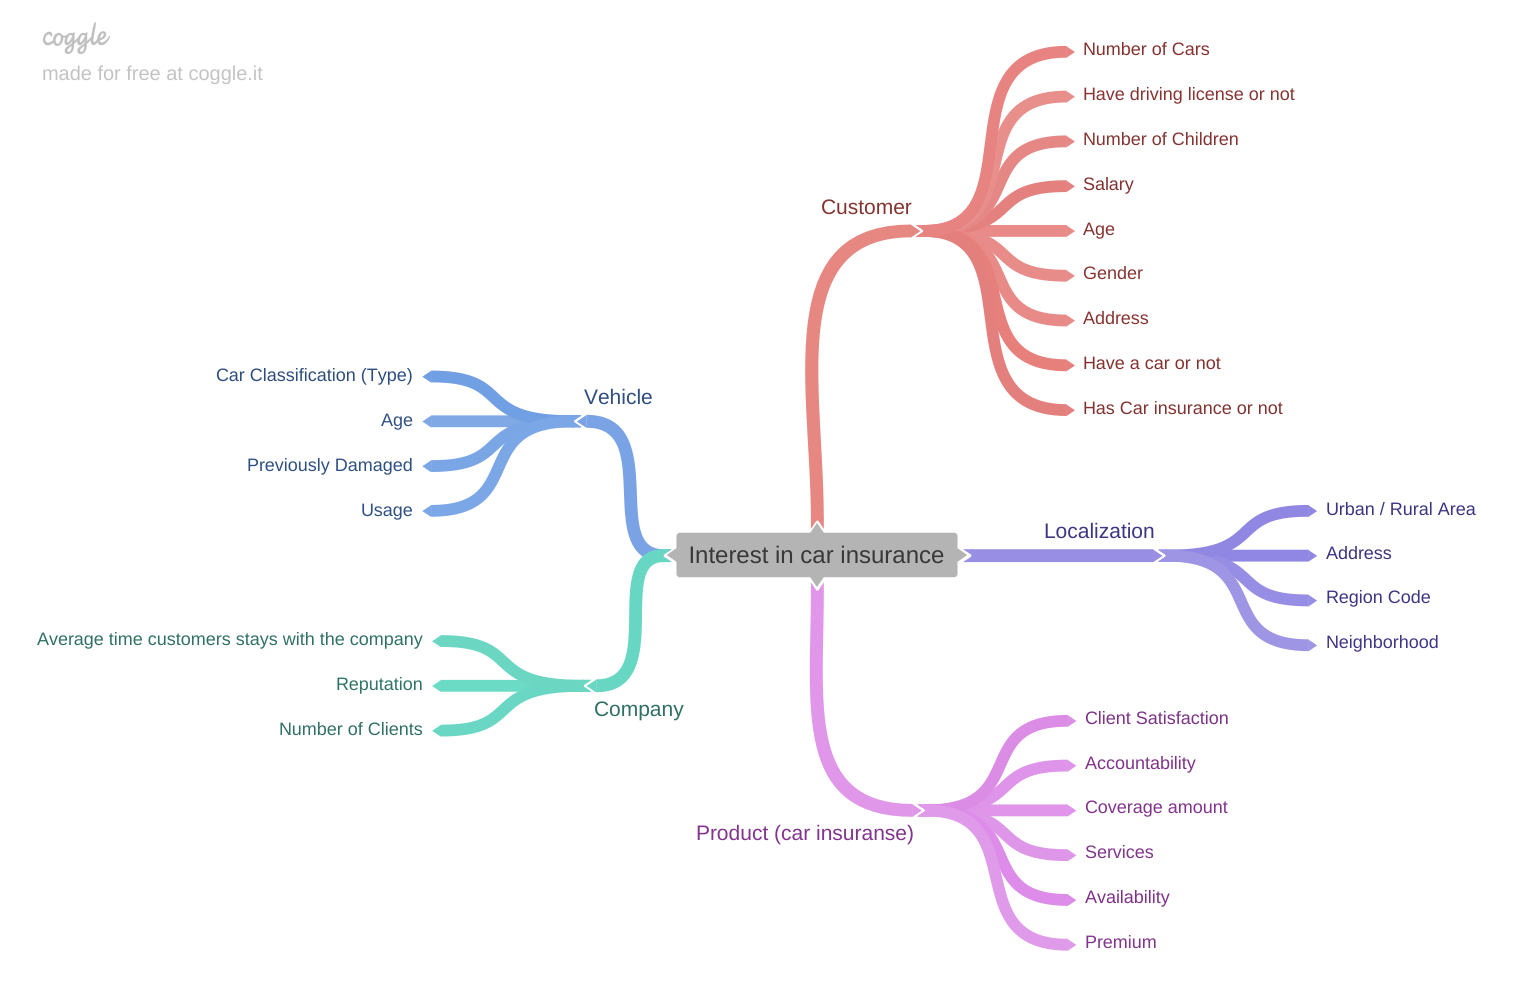

In [20]:
Image('images/mindmaphypotesis.png')

## 4.2. Hypothesis Creation

**Vehicle Hypotesis**

1. Customer that has cars with better classification (eg: pickups, SUV) are more likely to be interested in car insurance

2. Customers that has new car are more likely to be insterested in car insurance

3. Customers that has car that have been previously damaged are more likely to be interested in car insurance

4. Customers that uses the to work (eg: taxi, delivery, uber) are more likely to be interested in car insurance

**Company Hypothesis**

5. Customers that are client for longer are more likely to be interested in car insurance

6. Customers are more likely to be interested in car insurance if the rating/avaliation (by customers) is higher/better

7. Customers are more likely to be interested in car insurance if the company have a big number of customers

**Customer Hypothesis**

8. Customers that have more cars are more likely to be interested in car insurance

9. Customers that have driving license are more likely to be interested in car insurance

10. Customers that have more children are more likely to be interested in car insurance

11. Customers that have bigger salary are more likely to be interested in car insurance

12. Older customers are more likely to be interested in car insurance

13. Female customers are more likely to be interested in car insurance

14. Customers that have a car are more likely to be interested in car insurance

15. Customers that do not have a car insura ce previously are more likely to be interested in car insurance

**Localization Hypothesis**

16. Customers that lives in urban areas are more likely to be interested in car insurance

17. Customers that lives in violent neighborhood neighborhood

**Product (car insurance) Hypotesis**

18. Customers are more likely to be interested in car insurance the bigger the coverage amount (R$)

19. Customers are more likely to be interested in car insurance if the service is good

20. Customers are more likely to be interested in car insurance the lower the premium